In [388]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [389]:
path = "../Data/MCity/04Stage/Graphs/32_1_0_1_Graph.gexf"

In [390]:
def readGraph(path):
    try:
        graph = nx.read_gexf(path)
        return graph
    except FileNotFoundError:
        print(f"File '{path}' not found in '{path}'.")
        return None
    except nx.NetworkXError as e:
        print(f"Error reading graph from '{path}': {e}")
        return None

In [391]:
graph = readGraph(path)

In [392]:
print(nx.number_of_edges(graph))

123


In [393]:
print(graph.edges(data= True))

[('19636', '40217', {'possession': 3.0, 'location_0': 35.7, 'location_1': 61.8, 'pass_length': 23.093073, 'pass_height_id': 1.0, 'pass_end_location_0': 40.9, 'pass_end_location_1': 39.3, 'pass_outcome_name': 'nan', 'id': '0'}), ('19636', '40217', {'possession': 19.0, 'location_0': 66.0, 'location_1': 18.6, 'pass_length': 16.200308, 'pass_height_id': 1.0, 'pass_end_location_0': 77.8, 'pass_end_location_1': 7.5, 'pass_outcome_name': 'nan', 'id': '1'}), ('19636', '40217', {'possession': 19.0, 'location_0': 74.1, 'location_1': 13.8, 'pass_length': 7.0114193, 'pass_height_id': 2.0, 'pass_end_location_0': 81.1, 'pass_end_location_1': 14.2, 'pass_outcome_name': 'Incomplete', 'id': '2'}), ('19636', '15519', {'possession': 10.0, 'location_0': 37.5, 'location_1': 23.6, 'pass_length': 15.638734, 'pass_height_id': 1.0, 'pass_end_location_0': 51.9, 'pass_end_location_1': 29.7, 'pass_outcome_name': 'nan', 'id': '3'}), ('19636', '15519', {'possession': 37.0, 'location_0': 70.2, 'location_1': 60.3, 'p

In [394]:
def extract_positions(edge):
    """
    Extract initial and final positions from the edge attributes.
    """
    initial_x, initial_y = edge[2]['location_0'], edge[2]['location_1']
    final_x, final_y = edge[2]['pass_end_location_0'], edge[2]['pass_end_location_1']
    return initial_x, initial_y, final_x, final_y

In [395]:
def bound_indices(initial_x, initial_y, final_x, final_y, matrix_width, matrix_height):
    """
    Ensure the indices are within the bounds of the matrix.
    """
    initial_x_index = min(int(initial_x), matrix_width - 1)
    initial_y_index = min(int(initial_y), matrix_height - 1)
    final_x_index = min(int(final_x), matrix_width - 1)
    final_y_index = min(int(final_y), matrix_height - 1)
    return initial_x_index, initial_y_index, final_x_index, final_y_index

In [396]:
def update_matrix(passes_matrix, initial_y_index, initial_x_index, final_y_index, final_x_index):
    """
    Increment the corresponding cells in the matrix for initial and final positions.
    """
    passes_matrix[initial_y_index][initial_x_index] += 1
    passes_matrix[final_y_index][final_x_index] += 1

In [397]:
matrix_height = 120
matrix_width = 80

# Create an empty matrix to store passes
passes_matrix = np.zeros((matrix_width, matrix_height))

In [398]:
for edge in graph.edges(data=True):
    initial_x, initial_y, final_x, final_y = extract_positions(edge)
    initial_x_index, initial_y_index, final_x_index, final_y_index = bound_indices(initial_x, initial_y, final_x, final_y, matrix_height, matrix_width)
    update_matrix(passes_matrix, initial_y_index, initial_x_index, final_y_index, final_x_index)


In [399]:
'''
for row in passes_matrix:
    # Iterate over each element in the row
    for element in row:
        # Print the element, separated by a space
        print(element, end=' ')
    # Move to the next line after printing each row
    print()
'''

"\nfor row in passes_matrix:\n    # Iterate over each element in the row\n    for element in row:\n        # Print the element, separated by a space\n        print(element, end=' ')\n    # Move to the next line after printing each row\n    print()\n"

In [400]:
total_sum = np.sum(passes_matrix)

print("Total sum of all values in the matrix:", total_sum)

Total sum of all values in the matrix: 246.0


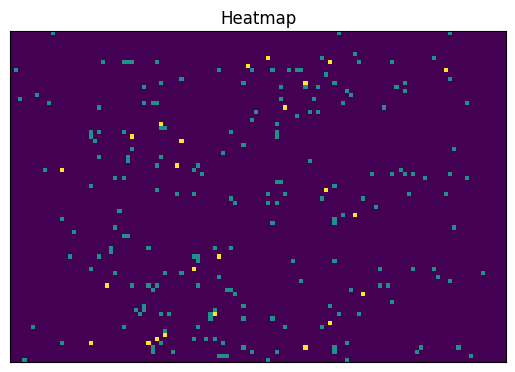

In [403]:
# Using Lanczos interpolation method
interp_method = 'nearest'

plt.imshow(passes_matrix, interpolation=interp_method, cmap='viridis')
plt.title("Heatmap")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()